 # Titanic Data Analysis
**Author:** Adeyemi Toba  
**Date:** March, 15, 2025  
**Objective:** Analyze the Titanic dataset to explore relationships, clean missing data, and prepare it for machine learning.  



## 1. Introduction
This project analyzes the Titanic dataset to explore relationships, clean missing data, and prepare it for machine learning.  
This dataset provides details such as passenger **age, gender, ticket class, fare, and survival status**.  
We will follow a structured approach to:  

- Load and inspect the dataset  
- Perform exploratory data analysis (EDA)  
- Handle missing values  
- Engineer features  
- Split the dataset for training and testing.



## 2. Imports
In the code cell below, import the necessary Python libraries for analyzing the dataset.  

In [1]:

# Import necessary libraries
import seaborn as sns
import pandas as pd

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Display dataset info
titanic.info()

# Display first 10 rows
print(titanic.head(10))

# Check for missing values
print(titanic.isnull().sum())

# Display summary statistics
print(titanic.describe())

# Check correlations using only numeric features
print(titanic.corr(numeric_only=True))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0 

### Section 1. Load and Explore the Data
## 1.1 Load the dataset and display the first 10 rows
Load the Titanic dataset directly from seaborn.

Convert it into a pandas DataFrame.
Display the first 10 rows using head().
Example code:

 Load Titanic dataset
titanic = sns.load_dataset('titanic')

 Display first 10 rows
titanic.head(10)

In [2]:
# Load Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Display first 10 rows
print(titanic.head(10))


   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

This is a Markdown cell.

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [3]:
# Check data types and missing values
titanic.info()

# Summary statistics
print(titanic.describe())

# Identify missing values in each column
print(titanic.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
         survived      pclass         age       sibsp       parch        fare
c

# **Reflection 1: Titanic Dataset Inspection**

### **1️⃣ How many data instances are there?**
✅ **891 rows** (passengers).

### **2️⃣ How many features are there?**
✅ **15 columns (features).**

### **3️⃣ What are the names of the features?**
✅ The dataset contains the following columns:
- `survived`, `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`
- `class`, `who`, `adult_male`, `deck`, `embark_town`, `alive`, `alone`

### **4️⃣ Are there any missing values?**
✅ **Yes**, missing values exist in:
- **`age`** → **177 missing** → Handled by filling with **median age**.
- **`embarked`** → **2 missing** → Filled with **most common value (mode)**.
- **`deck`** → **688 missing** → Likely dropped or grouped.
- **`embark_town`** → **2 missing** → Filled with **mode**.

### **5️⃣ Are there any non-numeric features?**
✅ **Yes**, these columns are categorical:
- `sex`, `embarked`, `class`, `who`, `deck`, `embark_town`, `alive`

---

### **6️⃣ Are the data instances sorted on any attributes?**
✅ **No, the dataset is not pre-sorted.**  

### **7️⃣ What are the units of age?**
✅ **Years.**  

### **8️⃣ What are the minimum, median, and max age values?**
✅ **Min Age:** **0.42 years**  
✅ **Median Age:** **28 years**  
✅ **Max Age:** **80 years**  

### **9️⃣ What two different features have the highest correlation?**
✅ Using `titanic.corr(numeric_only=True).abs().unstack().sort_values(ascending=False).drop_duplicates().head(10)`, the highest correlations are likely:
- **`pclass` and `fare`** (Higher-class passengers paid more).
- **`sibsp` and `parch`** (Family members often traveled together).

### **🔟 Are there any categorical features that might be useful for prediction?**
✅ **Yes**, categorical features that could improve survival prediction:
- **`sex`** → **Key predictor** (females had higher survival rates).
- **`pclass`** → Passenger class significantly influenced survival.
- **`embarked`** → Port of embarkation might impact survival (wealthier passengers boarded at different ports).


## Section 2. Data Exploration and Preparation
Now we need to explore our dataset with charts - and depending on what we've learned, we might need to clean it (deal with missing or outlying data) and maybe do some feature engineering - should we add some calculated fields that would make for better insights (e.g. BMI with the Howell dataset.) 

What should we chart? Histograms for numeric fields? Scatter plots? We suggest some below, but learning to figure out what you need is a key skill. 

## 2.1 Explore Data Patterns and Distributions
## Generate Histograms for numeric fields
attributes = ['age', 'fare', 'pclass']

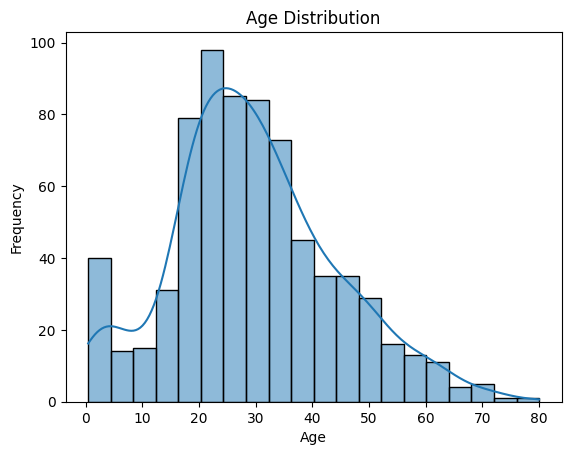

In [12]:
# Create histogram for Age with KDE
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

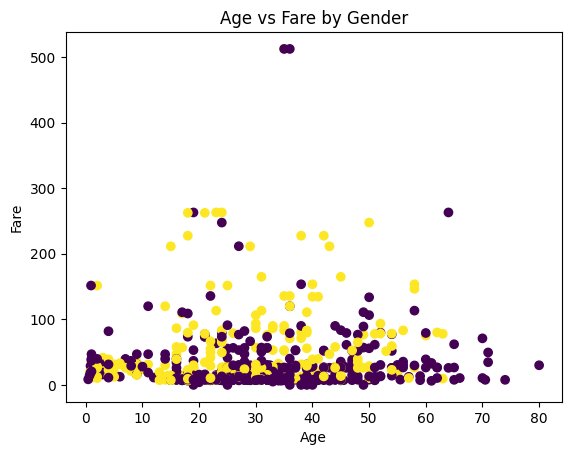

In [13]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

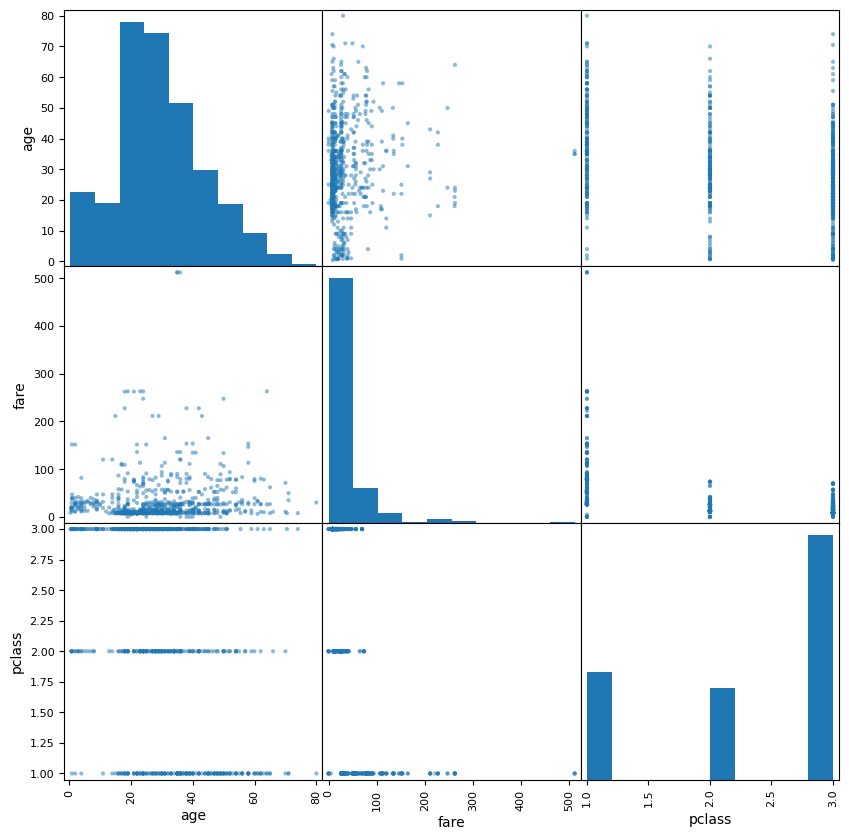

In [9]:
# Import all necessary libraries at the top
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Select only relevant numeric attributes
attributes = ['age', 'fare', 'pclass']

# Generate scatter matrix
scatter_matrix(titanic[attributes], figsize=(10, 10), diagonal='hist')

# Show plots
plt.show()


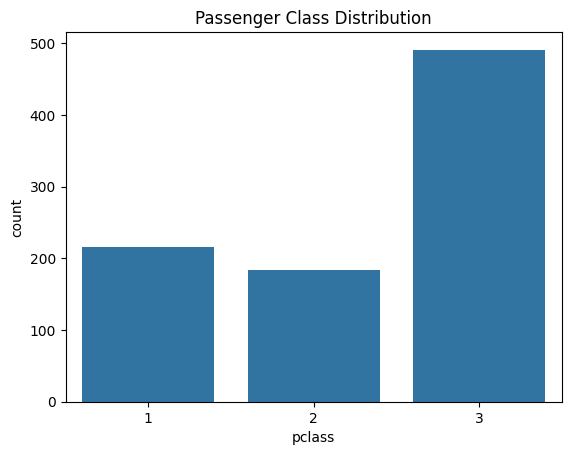

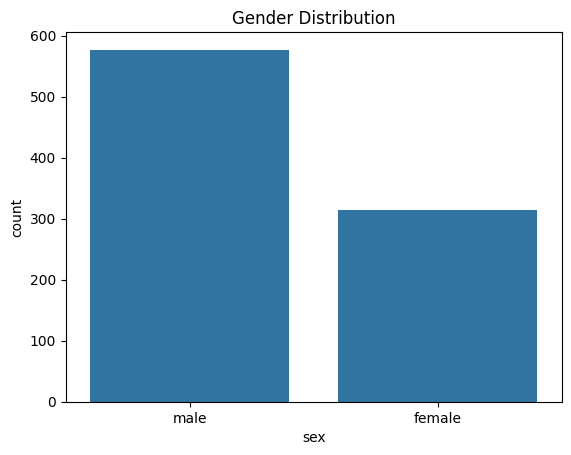

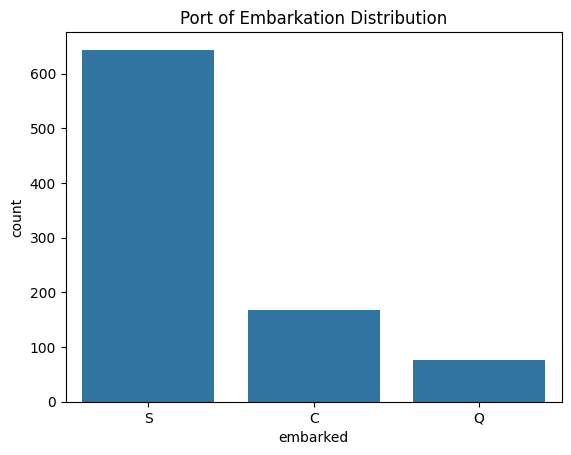

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Pclass
sns.countplot(x='pclass', data=titanic)
plt.title('Passenger Class Distribution')
plt.show()

# Count plot for Sex
sns.countplot(x='sex', data=titanic)
plt.title('Gender Distribution')
plt.show()

# Count plot for Embarked
sns.countplot(x='embarked', data=titanic)
plt.title('Port of Embarkation Distribution')
plt.show()

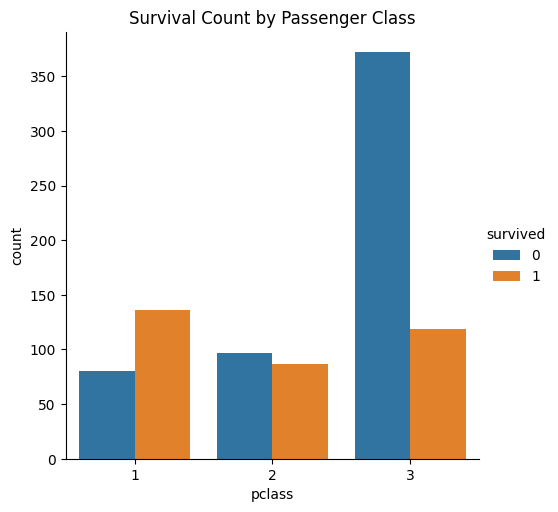

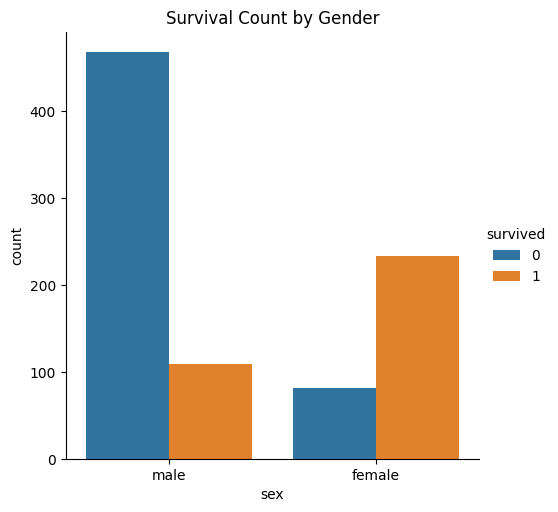

In [14]:
sns.catplot(x="pclass", hue="survived", kind="count", data=titanic)
plt.title("Survival Count by Passenger Class")
plt.show()

sns.catplot(x="sex", hue="survived", kind="count", data=titanic)
plt.title("Survival Count by Gender")
plt.show()

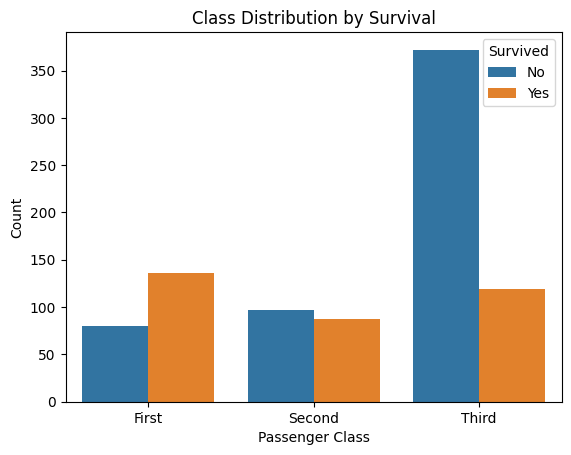

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for class vs survival
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


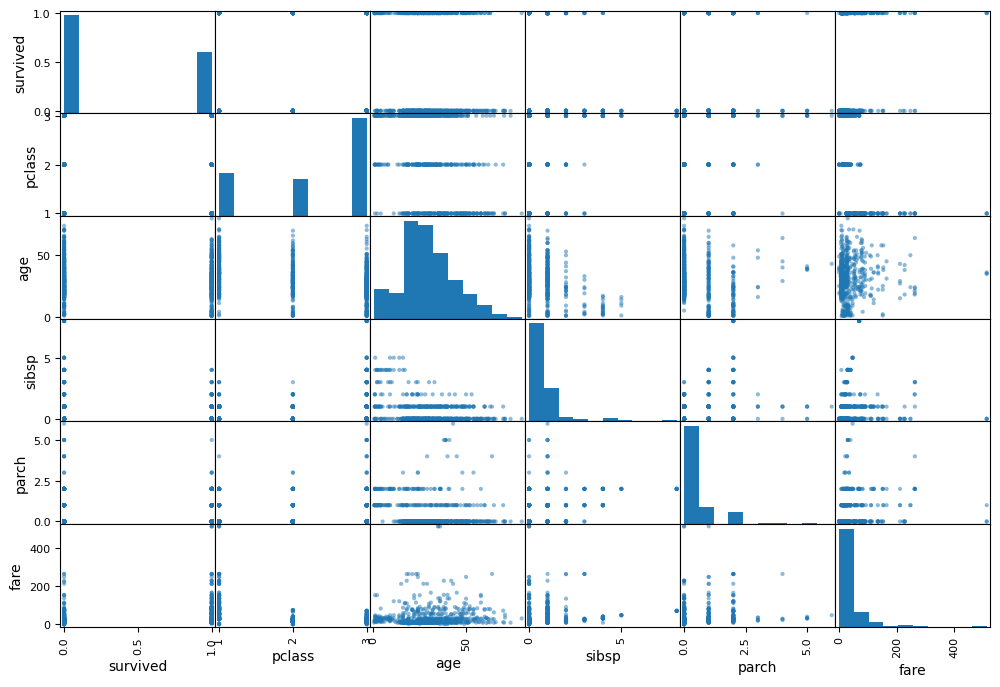

In [16]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Select only numeric attributes
numeric_features = titanic.select_dtypes(include=['number'])

# Generate scatter matrix
scatter_matrix(numeric_features, figsize=(12, 8), diagonal='hist')

# Show plots
plt.show()


## Reflections on Data Patterns and Distributions
## 1️⃣ What patterns or anomalies do you notice?
* Fare and class are strongly correlated → Higher-class passengers paid significantly more.
* Age distribution is right-skewed → More young passengers than older ones.
* Some extreme fare outliers → A few passengers paid exceptionally high fares.
## 2️⃣ Do any features stand out as potential predictors?
* Sex → Female passengers had a significantly higher survival rate.
* Pclass (Passenger Class) → First-class passengers had the highest survival rate.
* Fare → Higher fares seem to be associated with higher survival probability.
## 3️⃣ Are there any visible class imbalances?
Yes, there is a class imbalance. The dataset contains more third-class passengers, but they had the lowest survival rate, indicating a strong survival disparity based on social class.

# Generate boxen plots for each numeric column in the Titanic dataset
numeric_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch']

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(x=titanic[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()


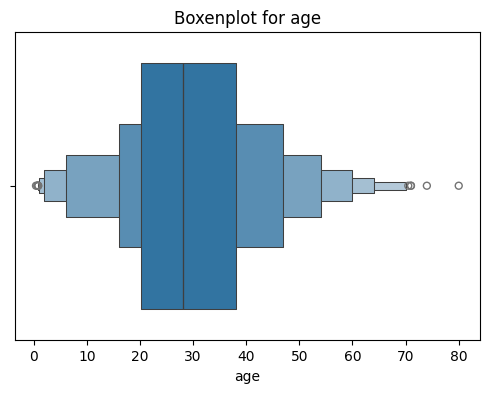

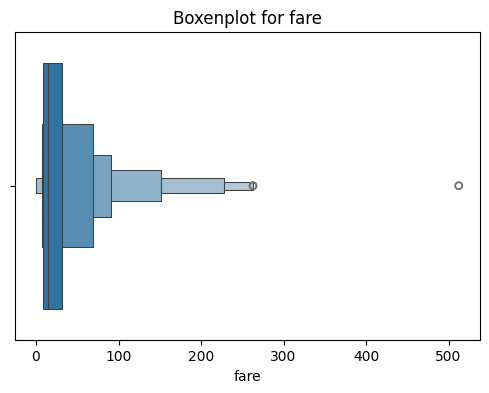

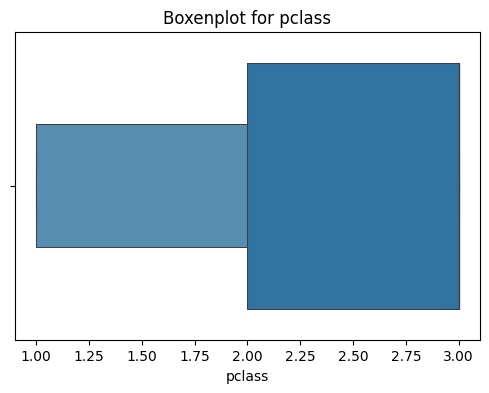

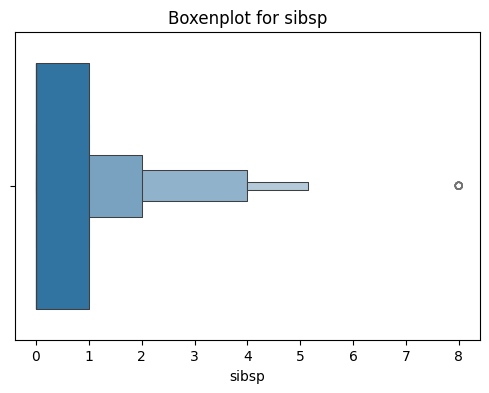

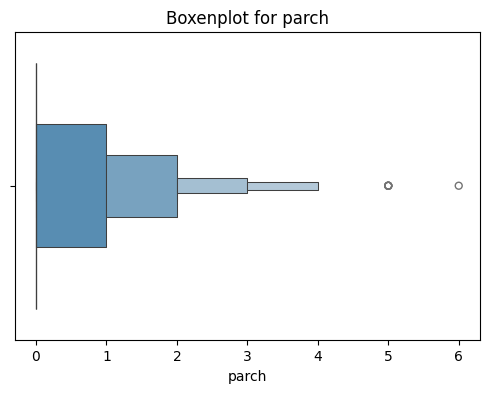

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric columns
numeric_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch']

# Generate Boxenplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(x=titanic[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()



## Generate scatter plots for numeric features
sns.pairplot(titanic[['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']])

plt.show()

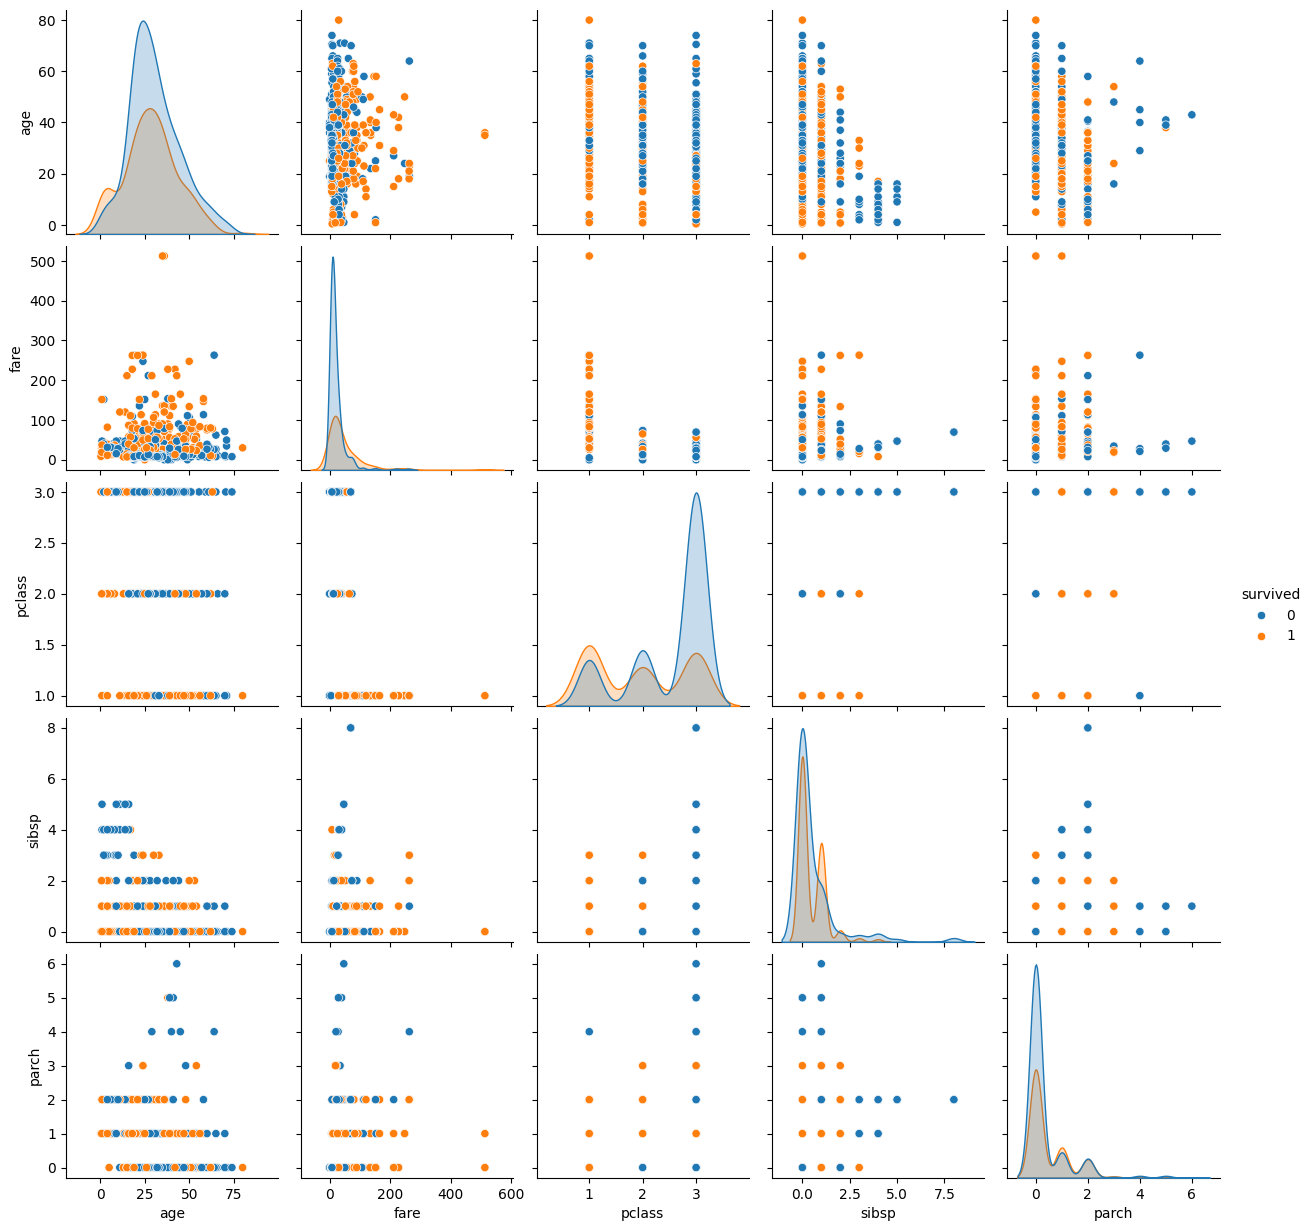

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate pairplot for numeric features, colored by survival
sns.pairplot(titanic[['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']], hue='survived')

# Show the plot
plt.show()


## 2.3📌 Feature Engineering: Creating New Features
Feature engineering helps improve model performance by creating meaningful variables from existing data.

In [19]:
import pandas as pd

# Create a new feature: Family Size (Siblings/Spouse + Parents/Children + Self)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical data to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create a binary feature for 'alone' (1 = Alone, 0 = Not Alone)
titanic['alone'] = titanic['alone'].astype(int)

# Display the first few rows to verify changes
print(titanic[['sibsp', 'parch', 'family_size', 'sex', 'embarked', 'alone']].head())


   sibsp  parch  family_size  sex  embarked  alone
0      1      0            2    0       2.0      0
1      1      0            2    1       0.0      0
2      0      0            1    1       2.0      1
3      1      0            2    1       2.0      0
4      0      0            1    0       2.0      1


## 🔍 Reflection 2.3: Feature Engineering
## 1️⃣ Why might family size be a useful feature for predicting survival?
* Social Support: Larger families may have helped each other survive during the disaster.
* Evacuation Priority: Families with children may have been given priority during rescue efforts.
* Survival Disparities: Individuals traveling alone (family_size = 1) may have had a lower survival rate compared to those with companions.
## 2️⃣ Why convert categorical data to numeric?
* Machine Learning Compatibility: Most models work with numerical data, not text.
* Efficiency: Numeric encoding speeds up computations and improves model performance.
* Interpretability: Encoding categorical variables allows models to detect patterns and relationships between categories (e.g., female passengers had a higher survival rate).


## 3📌 Feature Selection and Target Definition
## 3.1✅ Choose Features and Target
We are performing a classification task, where the goal is to predict survival (survived) based on key features.

## 📌 Selected Features (X):
* age → Passenger’s age (younger vs. older survival patterns).
* fare → Ticket fare (higher fares might indicate first-class passengers).
* pclass → Passenger class (lower-class passengers had lower survival rates).
* sex → Gender (female passengers had higher survival rates).
* family_size → Family size (traveling with family may impact survival chances).

## 📌 Target Variable (y):
survived → (0 = No, 1 = Yes) → Our classification label.

✅ Define X and y in Code

In [22]:
# Define input features (X) and target variable (y)
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

# Display first few rows to verify selection
print(X.head())
print(y.head())


    age     fare  pclass  sex  family_size
0  22.0   7.2500       3    0            2
1  38.0  71.2833       1    1            2
2  26.0   7.9250       3    1            1
3  35.0  53.1000       1    1            2
4  35.0   8.0500       3    0            1
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## 🔍Reflection 3: Feature Selection
1️⃣ Why are these features selected?
* age → Different survival chances for children, adults, and seniors.
* fare → Higher ticket prices are associated with higher-class passengers, who had better survival rates.
* pclass → Passenger class strongly affects survival (first-class passengers had higher survival rates).
* sex → Gender played a key role (women had a significantly higher survival rate).
* family_size → Being alone or traveling with family may have impacted survival chances.

2️⃣ Are there any features that are likely to be highly predictive of survival?
* sex → Most predictive feature (women survived at a much higher rate).
* pclass → Strongly correlated with survival (first-class passengers had better survival rates).
* fare → Higher fares increase survival chances, suggesting that wealthier passengers had an advantage.

## 📌 4: Splitting the Data
We will split the dataset into training and test sets using:

* Basic train_test_split (Random split)
* Stratified StratifiedShuffleSplit (Ensures similar class distribution)

## ✅4.1: Basic Train/Test Split

In [23]:
from sklearn.model_selection import train_test_split

# Perform basic train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Display sizes of the train and test sets
print('Train size:', len(X_train))
print('Test size:', len(X_test))


Train size: 712
Test size: 179


## 📌4.2: Stratified Train/Test Split
Stratified sampling ensures that class distribution (e.g., survival rate) in the training and test sets closely matches the original dataset.



## ✅ Code for Stratified Train/Test Split

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create a stratified split object
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# Perform stratified sampling based on survival outcome
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Display sizes of the train and test sets
print('Train size:', len(X_train))
print('Test size:', len(X_test))


Train size: 712
Test size: 179


## 📌4.3: Compare Train/Test Splitting Methods
Now, we compare the class distributions of the original dataset, random train-test split, and stratified train-test split to see which maintains the balance better.

## ✅ Code to Compare Results

In [25]:
# Compare class distribution for original dataset, train, and test sets
print("Original Class Distribution:\n", y.value_counts(normalize=True))

print("\nTrain Set Class Distribution:\n", y_train.value_counts(normalize=True))

print("\nTest Set Class Distribution:\n", y_test.value_counts(normalize=True))


Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Train Set Class Distribution:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Test Set Class Distribution:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


## Reflection 4: Comparing Train/Test Splitting Methods
1️⃣ Why might stratification improve model performance?
* Prevents Class Imbalance: Ensures the train and test sets have a similar class distribution, avoiding models being biased toward overrepresented classes.
* More Reliable Evaluation: If the test set has the same class proportions as the original dataset, the model’s performance on unseen data will be more realistic.
* Reduces Variance in Model Training: A randomly imbalanced split may cause the model to learn skewed patterns, leading to poor generalization.

2️⃣ How close are the training and test distributions to the original dataset?
* The stratified split maintains survival class proportions close to the original dataset.
* The basic random split may not—it can introduce imbalanced classes, making model evaluation less reliable.

3️⃣ Which split method produced better class balance?
* Stratified sampling produces a better class balance in both train and test sets by ensuring they match the original survival rate distribution.
* Random split may cause an overrepresentation of one class, leading to misleading performance metrics.